# Assignment 2

## Exercise 1: SPECIATE Database

In this Assignment we work with our first real chemistry dataset, coming from a large database, the [SPECIATE](https://www.epa.gov/air-emissions-modeling/speciate) database of the US Environmental Protection Agency (EPA), which contains information of organic gas and particulate matter (PM) speciation profiles of air pollution sources. 

This database is used heavily used in air quality models which implement certain pollution sources (e.g., a factory of a certain type), uses the emission profiles of these sources stored in the database to calculate what is emitted to the atmosphere and then investiagte in the model how the emissions disperse and potentially even interact (e.g., react chemically). 

Here we start with a dataset, which contains the properties of all chemical species inculded in the SPECIATE database, but without any link to source profiles of certain air pollution sources. The data is saved in the file `SPECIATE_5.3_Species_Properties.csv`.

**(a) 1 point**

We start from a blank cell, so don't forget your necessary import statements!

- Load the data into a `pd.DataFrame` called **`df`**.
- Be *careful*, many columns do not contain NaN when there is missing data, but often just have hypens. Remember the usage of the `na_values`-keyword in `pd.read_csv()` to deal with that.
- Drop all rows where no CAS number is available and save this reduced `pd.DataFrame` to **`df_cas`**. 

In [9]:
# YOUR CODE HERE
import pandas as pd

df = pd.read_csv('SPECIATE_5.3_Species_Properties.csv', na_values="-")
df_cas = df.dropna(subset='CAS')
df_cas

,SPECIES_ID,CAS,CAS no hyphen,AlternativeCAS,SPECIES_NAMES,SPECIES_NAME,HAPS,SPECIES_SYMBOL,SPEC_MW,NonVOCTOG,...,HENRYS_LAW_ATM-M3/MOLE_OPERA,OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA,OCTANOL_WATER_PARTITION_LOGP_OPERA,OXYGEN_to_CARBON_RATIO,PAMS,REPCMPSCORE,REPRESENTATIVE_COMPOUND_DSSTox_ID,REPRESENTATIVE_COMPOUND_NAME,SAROAD,SPECIES ID COUNT
0,1,135-98-8,135988,135988,(1-methylpropyl)benzene || sec-butylbenzene ||...,(1-methylpropyl)benzene (or sec-butylbenzene),NO,NaN,134.222,NO,...,0.008026,4.31259,4.568220,0.0,NO,4.0,DTXSID2022333,(1-methylpropyl)benzene (or sec-butylbenzene),45234,1
1,2,54105-77-0,54105770,54105770,(2-methylbutyl)cyclohexane || 1-cyclohexyl-2-m...,(2-methylbutyl)cyclohexane,NO,NaN,154.297,NO,...,0.066073,4.98676,5.423180,0.0,NO,4.0,DTXSID50880738,(2-methylbutyl)cyclohexane,99052,1
2,3,538-93-2,538932,538932,(2-methylpropyl)benzene || isobutylbenzene,(2-methylpropyl)benzene (or isobutylbenzene),NO,NaN,134.222,NO,...,0.008062,4.31259,4.438320,0.0,NO,4.0,DTXSID6027181,(2-methylpropyl)benzene (or isobutylbenzene),45235,1
3,3037,768-00-3,768003,768003,(E)-(1-Methylpropenyl)benzene || trans-2-Phen...,(E)-(1-Methylpropenyl)benzene (or trans-2-Phen...,NO,NaN,132.206,NO,...,0.003275,4.44688,3.633080,0.0,NO,4.0,DTXSID00875937,(E)-(1-Methylpropenyl)benzene (or trans-2-Phen...,NaN,1
4,3047,1576-87-0,1576870,1576870,(E)-2-pentenal || trans-2-Pentenal,(E)-2-pentenal (or trans-2-Pentenal),NO,NaN,84.118,NO,...,0.000040,3.27095,0.898533,0.2,NO,4.0,DTXSID80858788,(E)-2-pentenal (or trans-2-Pentenal),NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,778,7440-66-6,7440666,7440666,Zn || Zinc,Zinc,NO,Zn,65.380,NO,...,NaN,NaN,NaN,NaN,NO,4.0,DTXSID7035012,Zinc,12167,1
3082,779,7440-67-7,7440677,7440677,Zirconium || Zr,Zirconium,NO,Zr,91.224,NO,...,NaN,NaN,NaN,NaN,NO,4.0,DTXSID0049818,Zirconium,12185,1
3083,2796,98-83-9,98839,98839,"α-Methylstyrene || Benzene, (1-methylethenyl)-",α-Methylstyrene,NO,NaN,118.179,NO,...,0.004011,4.49168,3.479500,0.0,NO,4.0,DTXSID9025661,α-Methylstyrene,NaN,1
3085,299,637-50-3,637503,637503,β-methylstyrene || β-Methylstyrol || ω-Methyl...,β-methylstyrene (or β-Methylstyrol || ω-Methyl...,NO,NaN,118.179,NO,...,0.002190,4.52832,3.349790,0.0,NO,4.0,DTXSID2060919,β-methylstyrene (or β-Methylstyrol || ω-Methyl...,98020,1


In [2]:
#print(df_cas)

**(b) 4 points + 1 bonus**

We now want to evaluate which substances out of this dataset are registered in pubchempy. 

- Implement a function **`check_pubchempy(df)`** which retrieves the `pcp.Compound` objects found in PubChem as a list (using the CAS number as identifier)
- Access the first element and retrieve its xlogp (octanol/water partition coefficient) value and store it into **`df`** under a new column with label `pcp_xlogp`.
- If the search on PubChem does not return any compound, the column should be filled with NaN instead. This case needs to be handled!
- As the function would otherwise run for ever (2000+ queries), implement a simple counter and return the updated **`df`** after the first 10 compounds are found/not found.
- To monitor your queries, it might be useful to implement `print` statements, which tell you the names and `pcp.Compound` objects which are retrieved currently &rarr; **1 bonus point!**

In [18]:
import numpy as np
import pubchempy as pcp


def check_pubchempy(df):
    # YOUR CODE HERE
    df = df.copy() # It is good practice to always return a copy of the input DataFrame in a function

    counter=0
    while idx in df.index and counter < 10:
        print(f"Searching for CAS: {df.loc[idx, 'CAS']} \n")
        compound = pcp.get_compounds(df.loc[idx, 'CAS'], 'name')

        if compound:
            print(f"Found: {compound} \n"
                  f"Considering the first compound IUPAC Name: {compound[0].iupac_name} \n"
                  f"Appending to dataframe \n"
                  f"###################### \n")
            df.loc[idx, 'pcp_xlogp'] = compound[0].xlogp
        else:
            df.loc[idx, 'pcp_xlogp'] = np.nan
            print(f"nothing found for: {df.loc[idx,'CAS']} \n")

        counter += 1

    print(df['pcp_xlogp'].head(10))

    return df

In [12]:
df_cas = check_pubchempy(df_cas)

Searching for CAS: 135-98-8 

Found: [Compound(8680)] 
Considering the first compound IUPAC Name: butan-2-ylbenzene 
Appending to dataframe 
###################### 

Searching for CAS: 54105-77-0 

Found: [Compound(143127)] 
Considering the first compound IUPAC Name: 2-methylbutylcyclohexane 
Appending to dataframe 
###################### 

Searching for CAS: 538-93-2 

Found: [Compound(10870)] 
Considering the first compound IUPAC Name: 2-methylpropylbenzene 
Appending to dataframe 
###################### 

Searching for CAS: 768-00-3 

Found: [Compound(5354125)] 
Considering the first compound IUPAC Name: [(E)-but-2-en-2-yl]benzene 
Appending to dataframe 
###################### 

Searching for CAS: 1576-87-0 

Found: [Compound(5364752)] 
Considering the first compound IUPAC Name: (E)-pent-2-enal 
Appending to dataframe 
###################### 

Searching for CAS: 98-19-1 

Found: [Compound(7378)] 
Considering the first compound IUPAC Name: 1-tert-butyl-3,5-dimethylbenzene 
Appending

In [11]:
df_cas

,SPECIES_ID,CAS,CAS no hyphen,AlternativeCAS,SPECIES_NAMES,SPECIES_NAME,HAPS,SPECIES_SYMBOL,SPEC_MW,NonVOCTOG,...,HENRYS_LAW_ATM-M3/MOLE_OPERA,OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA,OCTANOL_WATER_PARTITION_LOGP_OPERA,OXYGEN_to_CARBON_RATIO,PAMS,REPCMPSCORE,REPRESENTATIVE_COMPOUND_DSSTox_ID,REPRESENTATIVE_COMPOUND_NAME,SAROAD,SPECIES ID COUNT
0,1,135-98-8,135988,135988,(1-methylpropyl)benzene || sec-butylbenzene ||...,(1-methylpropyl)benzene (or sec-butylbenzene),NO,NaN,134.222,NO,...,0.008026,4.31259,4.568220,0.0,NO,4.0,DTXSID2022333,(1-methylpropyl)benzene (or sec-butylbenzene),45234,1
1,2,54105-77-0,54105770,54105770,(2-methylbutyl)cyclohexane || 1-cyclohexyl-2-m...,(2-methylbutyl)cyclohexane,NO,NaN,154.297,NO,...,0.066073,4.98676,5.423180,0.0,NO,4.0,DTXSID50880738,(2-methylbutyl)cyclohexane,99052,1
2,3,538-93-2,538932,538932,(2-methylpropyl)benzene || isobutylbenzene,(2-methylpropyl)benzene (or isobutylbenzene),NO,NaN,134.222,NO,...,0.008062,4.31259,4.438320,0.0,NO,4.0,DTXSID6027181,(2-methylpropyl)benzene (or isobutylbenzene),45235,1
3,3037,768-00-3,768003,768003,(E)-(1-Methylpropenyl)benzene || trans-2-Phen...,(E)-(1-Methylpropenyl)benzene (or trans-2-Phen...,NO,NaN,132.206,NO,...,0.003275,4.44688,3.633080,0.0,NO,4.0,DTXSID00875937,(E)-(1-Methylpropenyl)benzene (or trans-2-Phen...,NaN,1
4,3047,1576-87-0,1576870,1576870,(E)-2-pentenal || trans-2-Pentenal,(E)-2-pentenal (or trans-2-Pentenal),NO,NaN,84.118,NO,...,0.000040,3.27095,0.898533,0.2,NO,4.0,DTXSID80858788,(E)-2-pentenal (or trans-2-Pentenal),NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,778,7440-66-6,7440666,7440666,Zn || Zinc,Zinc,NO,Zn,65.380,NO,...,NaN,NaN,NaN,NaN,NO,4.0,DTXSID7035012,Zinc,12167,1
3082,779,7440-67-7,7440677,7440677,Zirconium || Zr,Zirconium,NO,Zr,91.224,NO,...,NaN,NaN,NaN,NaN,NO,4.0,DTXSID0049818,Zirconium,12185,1
3083,2796,98-83-9,98839,98839,"α-Methylstyrene || Benzene, (1-methylethenyl)-",α-Methylstyrene,NO,NaN,118.179,NO,...,0.004011,4.49168,3.479500,0.0,NO,4.0,DTXSID9025661,α-Methylstyrene,NaN,1
3085,299,637-50-3,637503,637503,β-methylstyrene || β-Methylstyrol || ω-Methyl...,β-methylstyrene (or β-Methylstyrol || ω-Methyl...,NO,NaN,118.179,NO,...,0.002190,4.52832,3.349790,0.0,NO,4.0,DTXSID2060919,β-methylstyrene (or β-Methylstyrol || ω-Methyl...,98020,1


**(c) 2 points**

Let's see how the PubChem Octanol/Water coefficient correlates with the values SPECIATE has stored (and retrieved from OPERA, the Open Structure-Activity Relationship Application).

- Write a function **`xlogp_pearson_correlation(df)`** which calculates and returns the Persons' correlation coefficient between the new 'pcp_xlogp' column and the existing 'OCTANOL_WATER_PARTITION_LOGP_OPERA'.

In [31]:
def xlogp_pearson_correlation(df):
    # YOUR CODE HERE
    df = df.copy()
    df_reduced = df[['CAS','OCTANOL_WATER_PARTITION_LOGP_OPERA','pcp_xlogp']].iloc[0:10]

    pearson = df_reduced.corr(numeric_only=True)
    #print(pearson.iloc[0,1])

    return pearson.iloc[0,1]

xlogp_pearson_correlation(df_cas)

0.9806806552113535

**(c) 4 points**

The database contains computed values which are decisive for the atmospheric fate of these molecules:
1) Vapor pressure (use 'VP_Pascal_EPI') determines the paritioning of the compound between its gas- and liquid phase, controlling both its abundance in the atmosphere and its occurence in particulate matter. 
2) Henry's law constant ('HENRYS_LAW_ATM-M3/MOLE_OPERA') describes the transfer of a chemical compound between the atmosphere and bodies of water, which is one of the key processes affecting the transport of compounds in the environment.
3) The reaction rate of a chemical species with hydroxyl radicals (OH) in the atmosphere ('ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE-SEC_OPERA') determines how quickly a pollutant degrades in the atmosphere chemically.
4) And as already discussed, the octanol water partition coefficient ('OCTANOL_WATER_PARTITION_LOGP_OPERA'), which gives an estimator if pollutants are more often found in the particle phase and bioaccumulate (hydrophobic behavior).

Now, let's explore the relations between these properties across the database:

- First, we reload the original dataset using `pd.read_csv()` into the `pd.DataFrame` called **`df`** as in exercise 1a (using the `na_value` keyword).
- Reduce the **`df`** to the four property columns given above.
- Write a function **`plot_correlation(df, xcolumn, ycolumn, xscale='linear', yscale='linear')`**, which uses matplotlib to plot the datapoints of the database agains each other, where we can also set the scales of the axes and the labels should be automatically the column names. The function doesn't need a `return` value. Inspect the data visually by looking into correlations of different variable combinations and using different axis scalings (log and linear). 
- Write a function **`inspect_correlation(df)`**, which computes the Spearman's rank correlation coefficient matrix and return the pairs (a list or tuple of containing two strings with the labels of the variables) with the highest Spearman's correlation coefficient (in absolute number so could be also a very high non-linear anti-correlation). Remember the trick to get rid of the diagonal values in a DataFrame (because they are 1 and the highest by default). 

In [32]:
import matplotlib.pyplot as plt

def plot_correlation(df,  xcolumn, ycolumn, xscale='linear', yscale='linear'):
    # YOUR CODE HERE
    fig, ax = plt.subplots(figsize=(10,5)) # initiating mpl, with a figure and an axis in the figure

    ax.plot(df[xcolumn], df[ycolumn], 'o', alpha=0.4)  # plotting a scatter plot of the given x and y column, with circular markers 'o'
    ax.set_yscale(yscale)  # setting the y scale, lin or log, depending on input
    ax.set_xscale(xscale)  # same as above but for x

    ax.set_xlabel(xcolumn)  # setting x label
    ax.set_ylabel(ycolumn)  # settin y label

    # make it look nice
    plt.grid(True)
    plt.tight_layout()
    return


def inspect_correlation(df):
    # YOUR CODE HERE
    corr_matrix = df.corr(numeric_only=True) # calculating the correlation matrix

    identity = np.eye(corr_matrix.shape[0], dtype=bool)  # setting the diagonal to TRUE

    off_diag_values = corr_matrix.mask(identity) # masking the identity (TRUEs)
    
    return off_diag_values.abs().stack().idxmax() # returning the: absolute (no negative values), stacked (one column), maximum idx of that column


# YOUR CODE HERE


df = pd.read_csv('SPECIATE_5.3_Species_Properties.csv', na_values="-")
df = df[['VP_Pascal_EPI', 'HENRYS_LAW_ATM-M3/MOLE_OPERA', 'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE-SEC_OPERA', 'OCTANOL_WATER_PARTITION_LOGP_OPERA']]
inspect_correlation(df)


('HENRYS_LAW_ATM-M3/MOLE_OPERA', 'OCTANOL_WATER_PARTITION_LOGP_OPERA')

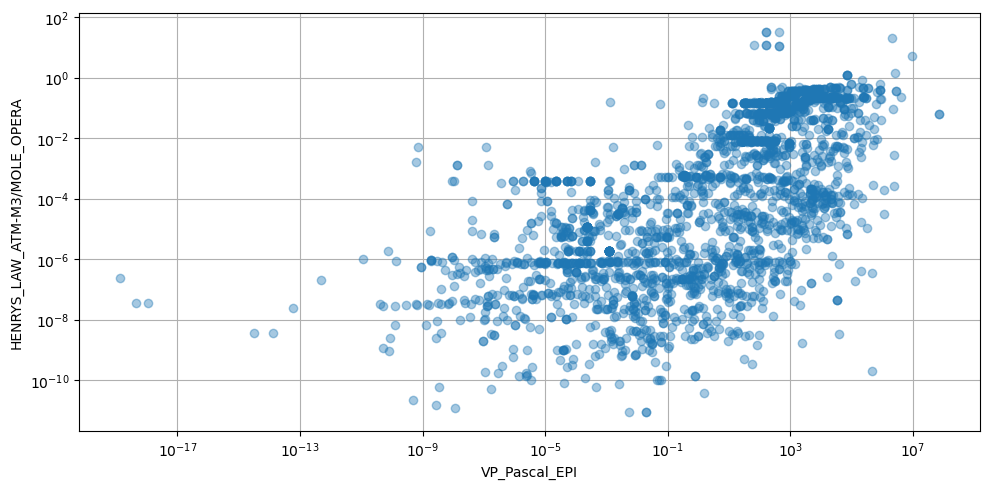

In [30]:
#plot_correlation(df, 'VP_Pascal_EPI', 'HENRYS_LAW_ATM-M3/MOLE_OPERA', xscale='linear', yscale='linear')
plot_correlation(df, 'VP_Pascal_EPI', 'HENRYS_LAW_ATM-M3/MOLE_OPERA', xscale='log', yscale='log')

#plot_correlation(df, 'VP_Pascal_EPI', 'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE-SEC_OPERA', xscale='linear', yscale='linear')
#plot_correlation(df, 'VP_Pascal_EPI', 'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE-SEC_OPERA', xscale='log', yscale='log')

#plot_correlation(df, 'VP_Pascal_EPI', 'OCTANOL_WATER_PARTITION_LOGP_OPERA', xscale='linear', yscale='linear')
#plot_correlation(df, 'VP_Pascal_EPI', 'OCTANOL_WATER_PARTITION_LOGP_OPERA', xscale='log', yscale='log')


#plot_correlation(df, 'HENRYS_LAW_ATM-M3/MOLE_OPERA', 'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE-SEC_OPERA', xscale='linear', yscale='linear')
#plot_correlation(df, 'HENRYS_LAW_ATM-M3/MOLE_OPERA', 'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE-SEC_OPERA', xscale='log', yscale='log')

#plot_correlation(df, 'HENRYS_LAW_ATM-M3/MOLE_OPERA', 'OCTANOL_WATER_PARTITION_LOGP_OPERA', xscale='linear', yscale='linear')
#plot_correlation(df, 'HENRYS_LAW_ATM-M3/MOLE_OPERA', 'OCTANOL_WATER_PARTITION_LOGP_OPERA', xscale='log', yscale='log')

#plot_correlation(df, 'OCTANOL_WATER_PARTITION_LOGP_OPERA', 'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE-SEC_OPERA', xscale='linear', yscale='linear')
#plot_correlation(df, 'OCTANOL_WATER_PARTITION_LOGP_OPERA', 'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE-SEC_OPERA', xscale='log', yscale='log')

**(d) 4 points + 1 bonus**

Henry's law constant defines the atmospheric abundance of highly water soluable species, and vapor pressure defines the atmospheric abundance of non-soluable species. 

- First, we reload the original dataset using `pd.read_csv()` into the `pd.DataFrame` called **`df`** as in exercise 1a (using the `na_value` keyword).
- We explore this relationship by plotting 'VP_Pascal_EPI' versus 'HENRYS_LAW_ATM-M3/MOLE_OPERA' and color-code it with the 'OCTANOL_WATER_PARTITION_LOGP_OPERA' using matplotlib. As before, perform the plotting within a function called `def plot_correlation_colored(df, xcolumn, ycolumn, ccolumn)`, use a log-log scale by default. Function doesn't need a `return` value. If the plot includes a colorbar &rarr; **1 bonus point!**
- The compounds of interest are the ones with a very high octanol/water partition coefficient and high as possible vapor pressure and the ones with a very high Henry's law constant and an octanol/water partition coefficient such that the compound is to some extent soluble in water. Set two efficient cuts on the dataset to obtain these two subsets `df_water_soluable_high_H` and `df_water_insoluable_high_VP` with both containing roughly 5-10 compounds of interest.
- Write a function `plot_structures(df)` which takes the smiles strings from the database (column 'Smiles Notation') and plots the structures of the molecules in `df_water_soluable_high_H` and `df_water_insoluable_high_VP` using `rdkit`. Please give labels (preferably the compound names or sum formula) to the displayed structures. Note that `plot_structures(df)` needs to return the GridImage which is produced using `rdkit.Chem.Draw.MolsToGridImage` to get it displayed. Do you find any chemical similarity which is apparent?


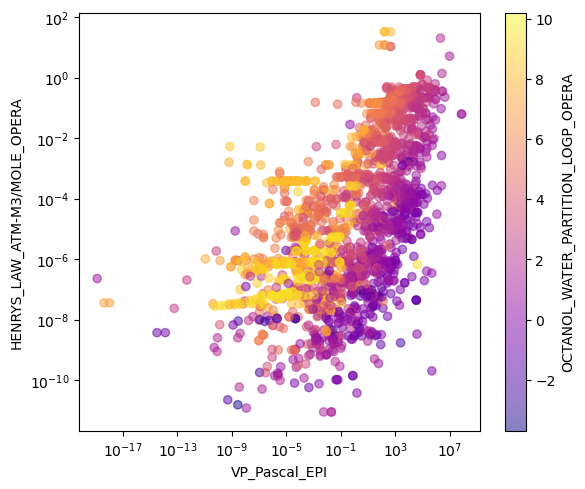

Substances of water insoluble substances with high vapor pressure in the database


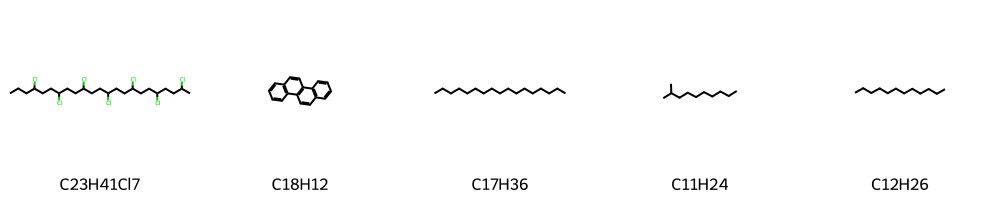

Notable similarities are: large molecules, no oxygen or nitrogen, mostly aliphatic
----------------------------------------------------------------------------------






Substances of water soluble substances with high Henry constant in the database


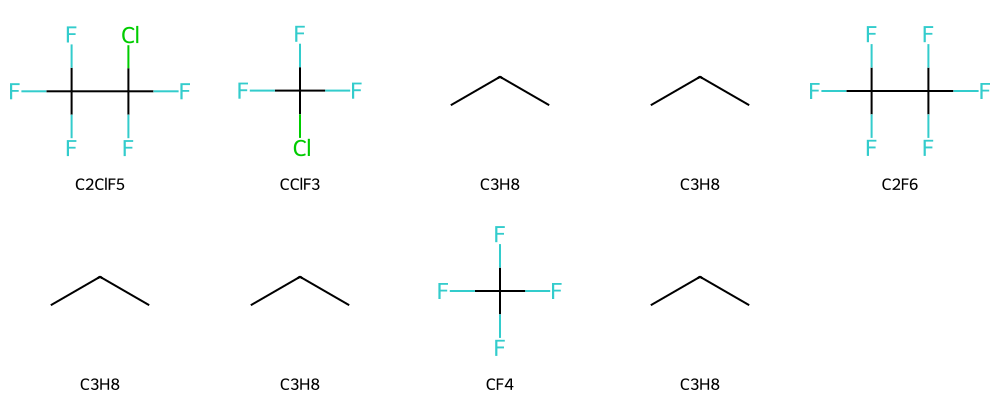

Notable similarities are: small molecules, some are highly halogenated
Maybe an error in database? Five substances are the same but with different CAS
----------------------------------------------------------------------


In [35]:
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.cm
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole


def plot_correlation_colored(df, xcolumn, ycolumn, ccolumn):
    # YOUR CODE HERE
    # initiating mpl, with a figure and an axis in the figure
    fig, ax = plt.subplots(figsize=(6, 5))
    
    # setting the limits for the colormap and normalizing it
    cnorm = matplotlib.colors.Normalize(vmin=df[ccolumn].min(), vmax=df[ccolumn].max())

    # plotting a scatter plot of the given x and y column, with circular markers 'o' and ccolumn as colormap 
    sc = ax.scatter(df[xcolumn], df[ycolumn], marker='o', alpha=0.5,
                    c=df[ccolumn], cmap=matplotlib.cm.plasma, norm=cnorm
                    )
    
    ax.set_xscale('log')  # setting the y scale, lin or log, depending on input
    ax.set_yscale('log')  # same as above but for x

    ax.set_xlabel(xcolumn)  # setting x label
    ax.set_ylabel(ycolumn)  # settin y label

    fig.colorbar(sc, ax=ax, label=ccolumn)

    plt.tight_layout()  # make it look nice
    # plt.grid()
    plt.show()
    return


def plot_structures(df):
    smiles = df['Smiles Notation'].to_list()
    substances = []
    formula = df['Molecular Formula'].to_list()

    for s in smiles:
            mol = Chem.MolFromSmiles(s)
            substances.append(mol)

    gi = Chem.Draw.MolsToGridImage(substances, molsPerRow=5, useSVG=True, legends=formula)

    display(gi)
    return 



# YOUR CODE HERE
# ---- Preparing Dataframe ---- #
# Read in data, with  "-" also for NaN detection
df = pd.read_csv('SPECIATE_5.3_Species_Properties.csv', na_values="-")
# Defining columns to be kept in df
cols_to_keep = ['CAS', 'VP_Pascal_EPI', 'HENRYS_LAW_ATM-M3/MOLE_OPERA', 
                'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE-SEC_OPERA', 
                'OCTANOL_WATER_PARTITION_LOGP_OPERA', 'Smiles Notation', 'Molecular Formula'
               ]
df = df[cols_to_keep]

# ---- function to plot ---- #
plot_correlation_colored(df, 'VP_Pascal_EPI', 'HENRYS_LAW_ATM-M3/MOLE_OPERA', 'OCTANOL_WATER_PARTITION_LOGP_OPERA')


# ---- Filtering data based on solubilit and vp ---- #
oct_wat_limit_high = df['OCTANOL_WATER_PARTITION_LOGP_OPERA'].quantile(0.75)
vp_limit = df['VP_Pascal_EPI'].quantile(0.75)

df_water_insoluable_high_VP = df[(
    df['OCTANOL_WATER_PARTITION_LOGP_OPERA'] > oct_wat_limit_high)
    & (df['VP_Pascal_EPI'] >= vp_limit)
    ]

oct_wat_limit_low = df['OCTANOL_WATER_PARTITION_LOGP_OPERA'].quantile(0.30)
h_limit = df['HENRYS_LAW_ATM-M3/MOLE_OPERA'].quantile(0.95)

df_water_soluable_high_H = df[(
    df['OCTANOL_WATER_PARTITION_LOGP_OPERA'] < oct_wat_limit_low)
    & (df['HENRYS_LAW_ATM-M3/MOLE_OPERA'] >= h_limit)
    ]

# ---- plotting structures
print(f"Substances of water insoluble substances with high vapor pressure in the database")
plot_structures(df_water_insoluable_high_VP)

similarities_1 = "Notable similarities are: large molecules, no oxygen or nitrogen, mostly aliphatic"
print(similarities_1)
print('-' * len(similarities_1))

print(f"\n\n\n")
print(f"\n\nSubstances of water soluble substances with high Henry constant in the database")
plot_structures(df_water_soluable_high_H)
similarities_2 = "Notable similarities are: small molecules, some are highly halogenated"
print(similarities_2)
print(f"Maybe an error in database? Five substances are the same but with different CAS")
print('-' * len(similarities_2))



In [11]:
#print(f"\n \n Oct-Wat-Limit (high): {oct_wat_limit_high}")
#print(f"VP Limit: {vp_limit}")
#print(f'\nWater insoluble & high VP: \n {df_water_insoluable_high_VP}')

#print(f"\n \n Oct-Wat-Limit (low): {oct_wat_limit_low}")
#print(f"VP Limit: {h_limit} \n \n")
#print(f'Water soluble & high Henry: \n {df_water_soluable_high_H}')

**(f) 5 points**

Last, we explore source profiles stored in SPECIATE. We only focus on some pre-selected gaseous (not particulate) profiles: Diesel and Gasoline car engines, wood combustion, volatilization from asphalt and paints. We will make use of [`pd.DataFrame.groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) to disentengle profiles and species and their contributions to each other within that dataset. The results from [`pd.DataFrame.groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) are returned as a list (all groups identified, which we call `grouped`) of tuples which containing the key (the common entry identified by `pd.groupby`) of the group and the corresponding `pd.DataFrame()`contnaing the entries belonging to the group, so you efficiently can loop over it by `for key, group_df in grouped`. 

- Load the data from `./SPECIATE_5.3_Selected_Profiles_Gas_Emissions.csv` into a `pd.DataFrame()` called **`df`** (make sure NaN values are handled correctly, including hyphens).
- Write a function `get_profile_properties(df)` which uses [`pd.DataFrame.groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) to group the data along the 'PROFILE_NAME' and then compute the median and weighted average (using the 'WEIGHT_PERCENT' column as weights) of the profiles molecular weight 'SPEC_MW' and 'OXYGEN_to_CARBON_RATIO' and create a `pd.DataFrame` containing the columns  'PROFILE_NAME', 'MEDIAN_SPEC_MW', 'MEDIAN_OXYGEN_to_CARBON_RATIO', 'wAVERAGE_SPEC_MW', 'wAVERAGE_OXYGEN_to_CARBON_RATIO' for all profiles. 
- According to weighted average, which profile emits the heaviest compounds and which profile emits the highest degree of oxygenation, store the answers (string of 'PROFILE_NAME') in the variables `max_mw_profile` and `max_o_to_c_profile`.
- Last, we see that we can also group the data the other way around. Write a function `get_common_species(df)`, which uses [`pd.DataFrame.groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) to group along the 'SPECIES_ID' of SPECIATE. It then identifies which species are present across at least 5 profiles. You can print out the species names if you are interested. 
- In the same function, calculate how many of these highly common species are aromatic using rdkit and the 'Smiles Notation' of the database. Ultimately, the function `get_common_species(df)` should then return a tuple or list with the first entry the number of total common species and the second entry the number of aromatic molecules 

In [42]:
import pandas as pd
from rdkit import Chem
import numpy as np

def get_profile_properties(df):
    # YOUR CODE HERE
    # grouping the data based on the specified column
    grouped = df.groupby('PROFILE_NAME')

    summary_data = []  # initialize an empty list for the data

    for key, group_df in grouped:
        # calculating the median, mean and weighted mean (wmean) of the
        # molecular weight and storing them to variables
        mw_median = group_df['SPEC_MW'].median()
        mw_wmean = ((group_df['SPEC_MW'] * group_df['WEIGHT_PERCENT']).sum() / group_df['WEIGHT_PERCENT'].sum())
        #mw_mean = group_df['SPEC_MW'].mean()  # only to check an compare to wmean
        #print(f'{key}: \n median = {mw_median} \n mean = {mw_mean} \n w_mean = {mw_wmean}')

        # calculating the median, mean and weighted mean (wmean) of the
        # oxygen-to-carbon ratio and storing them to variables
        o2c_median = group_df['OXYGEN_to_CARBON_RATIO'].median()
        o2c_wmean = ((group_df['OXYGEN_to_CARBON_RATIO'] * group_df['WEIGHT_PERCENT']).sum() / group_df['WEIGHT_PERCENT'].sum())
        #o2c_mean = group_df['OXYGEN_to_CARBON_RATIO'].mean()  # only to check an compare to wmean
        #print(f'{key}: \n median = {o2c_median} \n mean = {o2c_mean} \n w_mean = {o2c_wmean}')

        # appending the calculated values to the initialized list from above
        summary_data.append({
            'PROFILE_NAME': key,
            'MEDIAN_SPEC_MW': mw_median,
            'wAVERAGE_SPEC_MW': mw_wmean,
            'MEDIAN_OXYGEN_to_CARBON_RATIO': o2c_median,
            'wAVERAGE_OXYGEN_to_CARBON_RATIO': o2c_wmean
        })

    # Creating a Dataframe from the lists
    df_summary = pd.DataFrame(summary_data)

    return df_summary


def get_common_speices(df):
    # YOUR CODE HERE
    # grouping the data based on the specified column
    grouped = df.groupby('SPECIES_ID')

    # Initializing lists for storing while for loops
    species = []
    smiles = []
    aromatics = []

    for key, group_df in grouped:
        # print(group_df.shape[0] > 4)
        if group_df.shape[0] > 4:
            # print(f"Species ID = {key}: \n{group_df.index}\n\n")
            species.append(group_df['SPECIES_NAME'].iloc[0])
            smiles.append(group_df['Smiles Notation'].iloc[0])
            #print(f"{group_df['SPECIES_NAME'].iloc[0]}:"
            #      f"{group_df['Smiles Notation'].iloc[0]}")

    #print(species)
    #print(smiles)

    i = 0  # initiating a simple counter
    for s in smiles:  # checking for each component for aromaticity
        # print(s)
        mol = Chem.MolFromSmiles(s)
        ring_info = mol.GetRingInfo()  # Get ring information

        # Testing for aromaticity:
        if len(ring_info.AtomRings()) == 0:  # Checking if there are no rings, cannot be aromat
            aromatics.append(False)
            #print(f"{i} - No ring found.")
        else:
            is_aromatic = False  # Flag to track aromaticity
            #print(ring_info.AtomRings())
            #print(f"{i} - found ring. Checking {species[i]} for aromaticity.")
            for ring in ring_info.AtomRings():  # Checking the rings for aromaticity (from lecture)
                if all(mol.GetAtomWithIdx(idx).GetIsAromatic() for idx in ring):
                    # if all atoms in a ring are aromatic -> append True
                    is_aromatic = True  # set aromaticity flag to true

            if is_aromatic:  # Checking if the flag has turned to True in the loop
                aromatics.append(True)
                # print(f'Index {i}: Aromatic')
            else:
                aromatics.append(False)
                # print(f'Index {i}: Not-Aromatic')

        i += 1
        # print(f"{i}: {aromatics}")

    #print(f"\n\nSpecies: {len(species)}")
    #print(f"Aromatics: {len(aromatics)}")

    no_species = len(species)
    no_aromatic_species = sum(aromatics)
    #result = (no_species, no_aromatic_species)

    return (no_species, no_aromatic_species)

# YOUR CODE HERE
df = pd.read_csv('SPECIATE_5.3_Selected_Profiles_Gas_Emissions.csv', na_values="-")

# ---- get_profile_properties ---- #
get_profile_properties(df)
summary = get_profile_properties(df)

max_mw_profile = summary['PROFILE_NAME'].iloc[summary['wAVERAGE_SPEC_MW'].idxmax()]
max_o_to_c_profile = summary['PROFILE_NAME'].iloc[summary['wAVERAGE_OXYGEN_to_CARBON_RATIO'].idxmax()]
print(f"Heaviest compounds - group: {max_mw_profile}\n"
      f"Highest degree of oxygenationand - group: {max_o_to_c_profile}")

get_common_speices(df)


Heaviest compounds - group: Pesticides - Agricultural
Highest degree of oxygenationand - group: CONS PRD- SUN SCREEN AND TANNING PRODUCT (2010 UPDATE)


(54, 16)